<a href="https://colab.research.google.com/github/AbeerProg/RRDS/blob/main/ModelsandHistograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Step 1: The dataset
file_path = '/content/Final_dataset.xlsx'
df = pd.read_excel(file_path)
# Step 2: identifing features and label
features = df.iloc[:, 1:-1]
labels = df.iloc[:, -1]


Training Logistic Regression...
Logistic Regression Accuracy: 0.8426698450536353
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2581
           1       0.83      0.85      0.84      2453

    accuracy                           0.84      5034
   macro avg       0.84      0.84      0.84      5034
weighted avg       0.84      0.84      0.84      5034



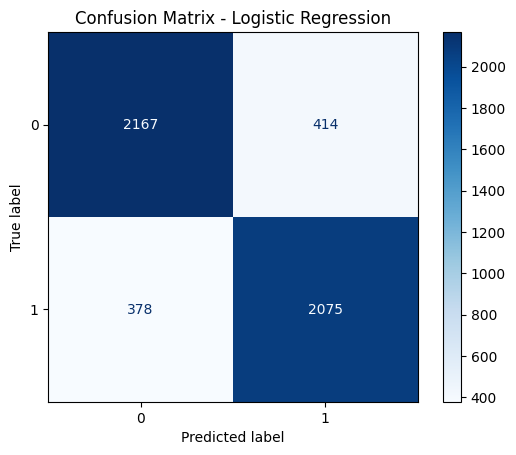

Training Random Forest...
Random Forest Accuracy: 0.9821215733015495
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2581
           1       0.99      0.97      0.98      2453

    accuracy                           0.98      5034
   macro avg       0.98      0.98      0.98      5034
weighted avg       0.98      0.98      0.98      5034



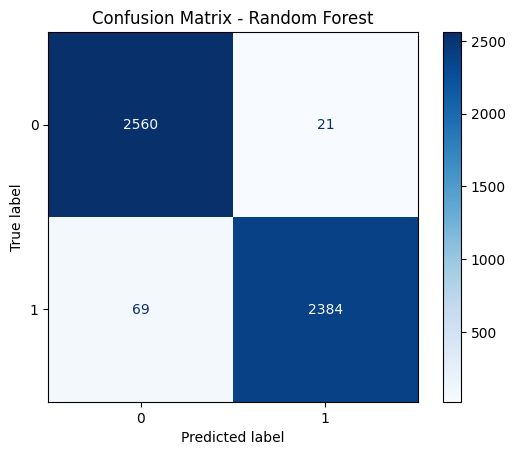

Training Support Vector Machine...
Support Vector Machine Accuracy: 0.9179578863726658
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2581
           1       0.91      0.92      0.92      2453

    accuracy                           0.92      5034
   macro avg       0.92      0.92      0.92      5034
weighted avg       0.92      0.92      0.92      5034



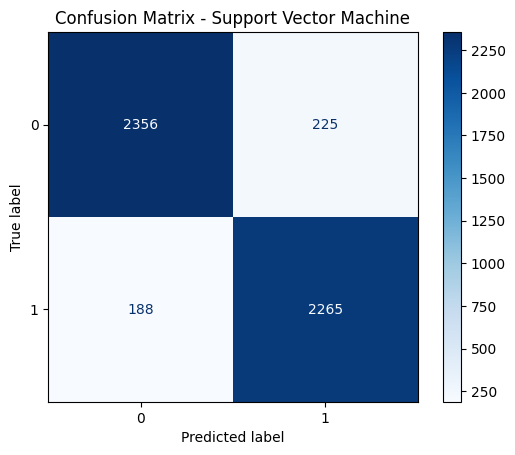

Training Decision Tree...
Decision Tree Accuracy: 0.9725864123957092
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2581
           1       0.98      0.97      0.97      2453

    accuracy                           0.97      5034
   macro avg       0.97      0.97      0.97      5034
weighted avg       0.97      0.97      0.97      5034



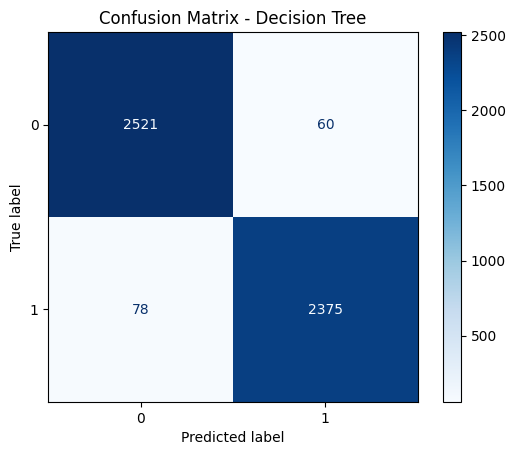

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9948351211760031
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2581
           1       1.00      0.99      0.99      2453

    accuracy                           0.99      5034
   macro avg       0.99      0.99      0.99      5034
weighted avg       0.99      0.99      0.99      5034



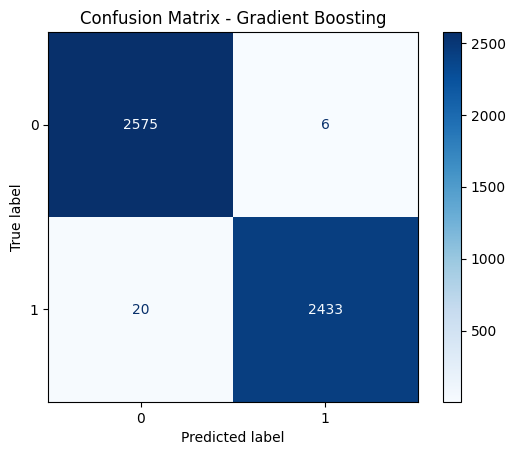

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:27:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9964243146603099
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2581
           1       1.00      0.99      1.00      2453

    accuracy                           1.00      5034
   macro avg       1.00      1.00      1.00      5034
weighted avg       1.00      1.00      1.00      5034



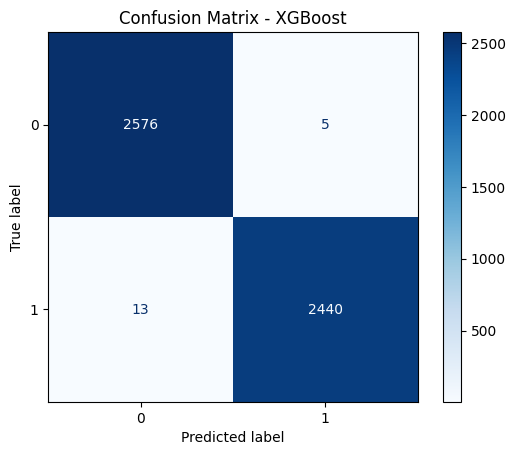


Model Comparison:
Logistic Regression - Accuracy: 0.8426698450536353
Random Forest - Accuracy: 0.9821215733015495
Support Vector Machine - Accuracy: 0.9179578863726658
Decision Tree - Accuracy: 0.9725864123957092
Gradient Boosting - Accuracy: 0.9948351211760031
XGBoost - Accuracy: 0.9964243146603099


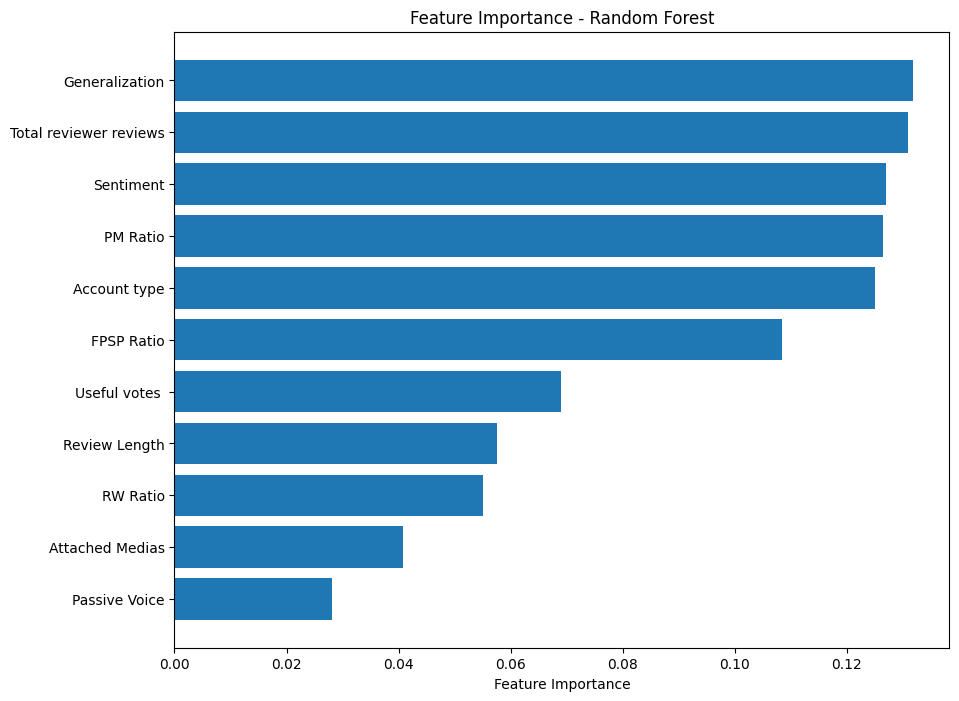

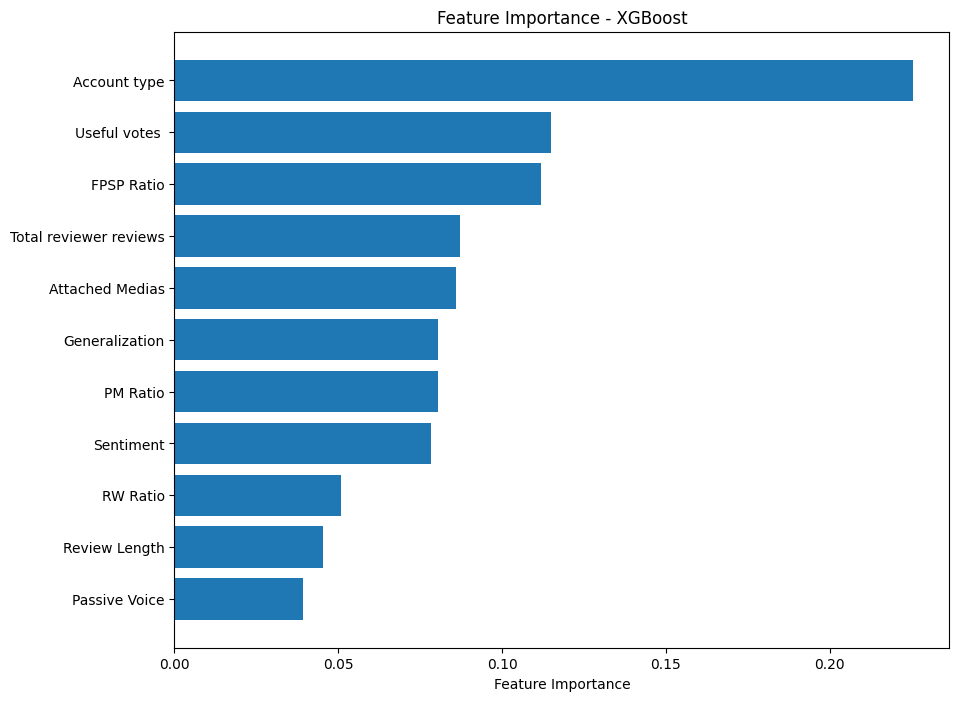

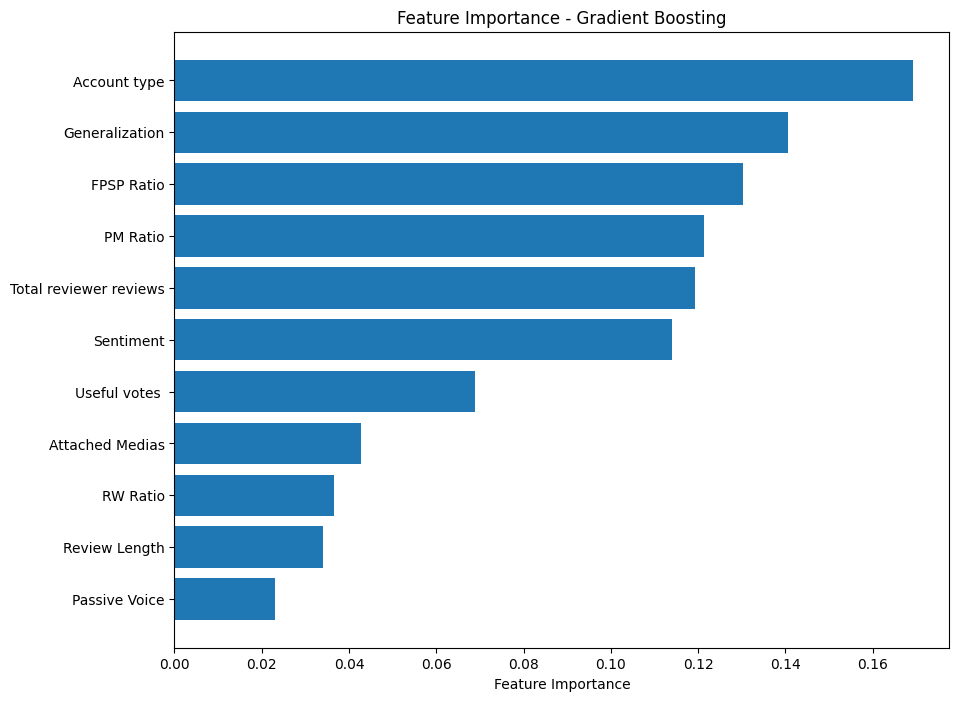

In [ ]:
# Step 3: Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features_scaled, labels)

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Step 7: Train the models and evaluate their performance
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"{model_name} Accuracy: {accuracy}")
    print(f"Classification Report for {model_name}:\n{report}")

    # Store results
    results[model_name] = {
        "model": model,
        "accuracy": accuracy,
        "report": report,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

    # Plot confusion matrix
    cm = results[model_name]["confusion_matrix"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Step 8: Compare model performance
print("\nModel Comparison:")
for model_name, result in results.items():
    print(f"{model_name} - Accuracy: {result['accuracy']}")

# Step 9: Feature Importance (Effect on Model Performance)

# Note: Not all models provide feature importances. We'll focus on models that do.
for model_name in ["Random Forest", "XGBoost", "Gradient Boosting"]:
    if model_name in results:
        model = results[model_name]["model"]
        if hasattr(model, "feature_importances_"):
            feature_importances = model.feature_importances_
            feature_names = features.columns

            # Sort features by importance
            sorted_idx = feature_importances.argsort()
            plt.figure(figsize=(10, 8))
            plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], align='center')
            plt.xlabel("Feature Importance")
            plt.title(f"Feature Importance - {model_name}")
            plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'Final_dataset.xlsx'
df = pd.read_excel(file_path)



In [ ]:
# Split the data into features and labels
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

#TF-IDF Vectorization for the text column
tfidf = TfidfVectorizer(max_features=2500)
text_features = tfidf.fit_transform(df.iloc[:, 0])  # Apply TF-IDF to the text

#Combine numerical features and TF-IDF features
import scipy
X_extended = scipy.sparse.hstack([X, text_features])

#Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_extended_resampled, y_extended_resampled = smote.fit_resample(X_extended, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_extended_resampled, y_extended_resampled, test_size=0.2, random_state=42)



In [ ]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Train and evaluate the baseline models
results_baseline = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_baseline.append({
        "Model": model_name,
        "Features": "Baseline",
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred)
    })

# Train and evaluate the extended models
results_extended = []
for model_name, model in models.items():
    model.fit(X_train_ext, y_train_ext)
    y_pred_ext = model.predict(X_test_ext)

    results_extended.append({
        "Model": model_name,
        "Features": "Extended",
        "Accuracy": accuracy_score(y_test_ext, y_pred_ext),
        "F1-Score": f1_score(y_test_ext, y_pred_ext),
        "Precision": precision_score(y_test_ext, y_pred_ext),
        "Recall": recall_score(y_test_ext, y_pred_ext),
        "AUC-ROC": roc_auc_score(y_test_ext, y_pred_ext)
    })

#Combine and display the results
results_df = pd.DataFrame(results_baseline + results_extended)
print("Model Performance Comparison:")
print(results_df)

#Save the results to a CSV file
results_df.to_csv('model_comparison_results.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model Performance Comparison:
                    Model  Features  Accuracy  F1-Score  Precision    Recall  \
0     Logistic Regression  Baseline  0.837108  0.835605   0.822091  0.849572   
1           Decision Tree  Baseline  0.956099  0.954962   0.954768  0.955157   
2           Random Forest  Baseline  0.970997  0.969810   0.984054  0.955972   
3       Gradient Boosting  Baseline  0.983909  0.983309   0.994167  0.972687   
4  Support Vector Machine  Baseline  0.702622  0.715885   0.669744  0.768854   
5     Logistic Regression  Extended  0.849424  0.847054   0.838594  0.855687   
6           Decision Tree  Extended  0.948947  0.947562   0.948529  0.946596   
7           Random Forest  Extended  0.932658  0.929154   0.953259  0.906237   
8       Gradient Boosting  Extended  0.991259  0.990991   0.995475  0.986547   
9  Support Vector Machine  Extended  0.701033  0.714150   0.668563  0.766408   

    AUC-ROC  
0  0.837417  
1  0.956075  
2  0.970625  
3  0.983631  
4  0.704265  
5  0.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load the dataset
file_path = 'Final_dataset.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Separate the text, features, and label
X_text = df.iloc[:, 0]  # First column for text
X_features = df.iloc[:, 1:-1]  # 11 numerical features
y = df.iloc[:, -1]  # Last column for label

# Handle the imbalance in the dataset by oversampling the minority class
df_majority = df[df['Label'] == 0]
df_minority = df[df['Label'] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state=42)  # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Update the features and labels after balancing
X_text = df_upsampled.iloc[:, 0]
X_features = df_upsampled.iloc[:, 1:-1]
y = df_upsampled.iloc[:, -1]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Define the vectorizers
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
bow_vectorizer = CountVectorizer(max_features=5000)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=5000)

# Transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X_text)
X_bow = bow_vectorizer.fit_transform(X_text)
X_bigram = bigram_vectorizer.fit_transform(X_text)

# Combine the TF-IDF, BoW, and bigram features with numerical features
X_tfidf_combined = pd.concat([pd.DataFrame(X_tfidf.toarray()), X_features.reset_index(drop=True)], axis=1)
X_bow_combined = pd.concat([pd.DataFrame(X_bow.toarray()), X_features.reset_index(drop=True)], axis=1)
X_bigram_combined = pd.concat([pd.DataFrame(X_bigram.toarray()), X_features.reset_index(drop=True)], axis=1)


In [ ]:
# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf_combined, y, test_size=0.2, random_state=42)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow_combined, y, test_size=0.2, random_state=42)
X_train_bigram, X_test_bigram, y_train, y_test = train_test_split(X_bigram_combined, y, test_size=0.2, random_state=42)


In [ ]:
# Convert all column names in the feature DataFrame to strings
X_tfidf_combined.columns = X_tfidf_combined.columns.astype(str)
X_bow_combined.columns = X_bow_combined.columns.astype(str)
X_bigram_combined.columns = X_bigram_combined.columns.astype(str)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Load the dataset
file_path = 'Final_dataset.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Separate the text, features, and label
X_text = df.iloc[:, 0]  # First column for text
X_features = df.iloc[:, 1:-1]  # 11 numerical features
y = df.iloc[:, -1]  # Last column for label

# Define the vectorizers with reduced max_features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
bow_vectorizer = CountVectorizer(max_features=1000)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=1000)

# Transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X_text)
X_bow = bow_vectorizer.fit_transform(X_text)
X_bigram = bigram_vectorizer.fit_transform(X_text)

# Combine the TF-IDF, BoW, and bigram features with numerical features
X_tfidf_combined = pd.concat([pd.DataFrame(X_tfidf.toarray()), pd.DataFrame(X_features)], axis=1)
X_bow_combined = pd.concat([pd.DataFrame(X_bow.toarray()), pd.DataFrame(X_features)], axis=1)
X_bigram_combined = pd.concat([pd.DataFrame(X_bigram.toarray()), pd.DataFrame(X_features)], axis=1)

# Convert all column names to strings
X_tfidf_combined.columns = X_tfidf_combined.columns.astype(str)
X_bow_combined.columns = X_bow_combined.columns.astype(str)
X_bigram_combined.columns = X_bigram_combined.columns.astype(str)

# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf_combined, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, solver='saga', n_jobs=-1),  # Solver optimized for larger data
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1),   # Use parallel processing
    'Support Vector Machine': SVC(probability=True)
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'

        results[name] = {
            'Accuracy': accuracy,
            'F1-Score': f1,
            'Precision': precision,
            'Recall': recall,
            'AUC-ROC': auc_roc
        }
    return pd.DataFrame(results).T

# Re-run the model evaluation
results_tfidf = train_and_evaluate(models, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Print results for inspection
print(results_tfidf)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                        Accuracy  F1-Score  Precision    Recall   AUC-ROC
Logistic Regression     0.760708  0.684275   0.769337  0.616150  0.824877
Random Forest           0.918296  0.894879   0.975833  0.826327  0.980560
Support Vector Machine  0.718110  0.649493   0.681239  0.620575  0.784715


In [ ]:
# Combine all results into a single DataFrame for comparison
comparison_df = pd.concat([results_tfidf.add_prefix('TF-IDF '),
                           results_bow.add_prefix('BoW '),
                           results_bigram.add_prefix('Bigram ')], axis=1)

print(comparison_df)

# Optionally visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df.T, annot=True, cmap='coolwarm')
plt.title('Comparison of Model Performance with Different Features')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'Final_dataset.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Separate the text, features, and label
X_text = df.iloc[:, 0]  # First column for text
X_features = df.iloc[:, 1:-1]  # 11 numerical features
y = df.iloc[:, -1]  # Last column for label

# Scale the numerical features
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)

# Define the vectorizers with reduced max_features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
bow_vectorizer = CountVectorizer(max_features=1000)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=1000)

# Transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X_text)
X_bow = bow_vectorizer.fit_transform(X_text)
X_bigram = bigram_vectorizer.fit_transform(X_text)



In [ ]:
# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_bigram, X_test_bigram, y_train, y_test = train_test_split(X_bigram, y, test_size=0.2, random_state=42)
X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features_scaled, y, test_size=0.2, random_state=42)

# Define traditional models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, solver='saga', n_jobs=-1),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1),
    'Support Vector Machine': SVC(probability=True)
}



In [ ]:
# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'

        results[name] = {
            'Accuracy': accuracy,
            'F1-Score': f1,
            'Precision': precision,
            'Recall': recall,
            'AUC-ROC': auc_roc
        }
    return pd.DataFrame(results).T



                        TF-IDF Accuracy  TF-IDF F1-Score  TF-IDF Precision  \
Logistic Regression            0.668296         0.559233          0.634386   
Random Forest                  0.665037         0.537448          0.641596   
Support Vector Machine         0.670857         0.547954          0.649242   

                        TF-IDF Recall  TF-IDF AUC-ROC  BoW Accuracy  \
Logistic Regression          0.500000        0.718139      0.646648   
Random Forest                0.462389        0.705803      0.677607   
Support Vector Machine       0.474004        0.714919      0.674814   

                        BoW F1-Score  BoW Precision  BoW Recall  BoW AUC-ROC  \
Logistic Regression         0.549020       0.593068    0.511062     0.683614   
Random Forest               0.536634       0.679086    0.443584     0.712611   
Support Vector Machine      0.547750       0.660422    0.467920     0.714408   

                        Bigram Accuracy  Bigram F1-Score  Bigram Precision  \
Log

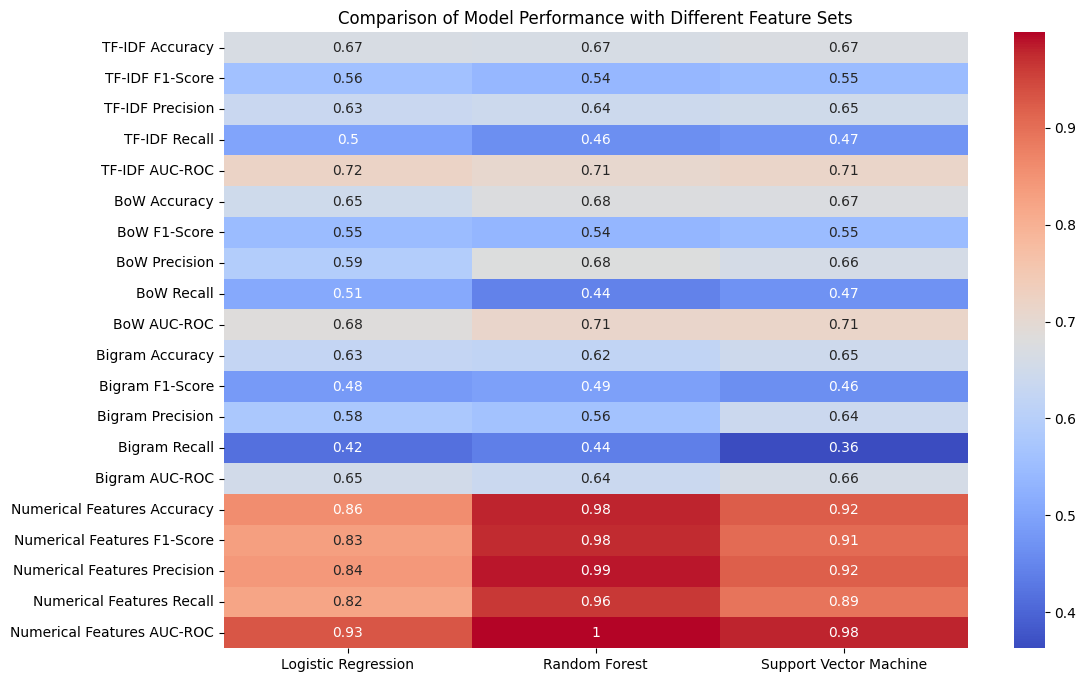

In [ ]:
# Evaluate models with TF-IDF features
results_tfidf = train_and_evaluate(models, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Evaluate models with BoW features
results_bow = train_and_evaluate(models, X_train_bow, X_test_bow, y_train, y_test)

# Evaluate models with Bigram features
results_bigram = train_and_evaluate(models, X_train_bigram, X_test_bigram, y_train, y_test)

# Evaluate models with only numerical features
results_features = train_and_evaluate(models, X_train_features, X_test_features, y_train_features, y_test_features)

# Combine all results into a single DataFrame for comparison
comparison_df = pd.concat([results_tfidf.add_prefix('TF-IDF '),
                           results_bow.add_prefix('BoW '),
                           results_bigram.add_prefix('Bigram '),
                           results_features.add_prefix('Numerical Features ')], axis=1)

print(comparison_df)

# Visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df.T, annot=True, cmap='coolwarm')
plt.title('Comparison of Model Performance with Different Feature Sets')
plt.show()


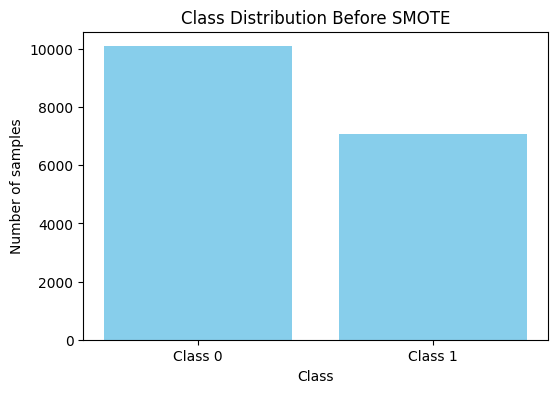

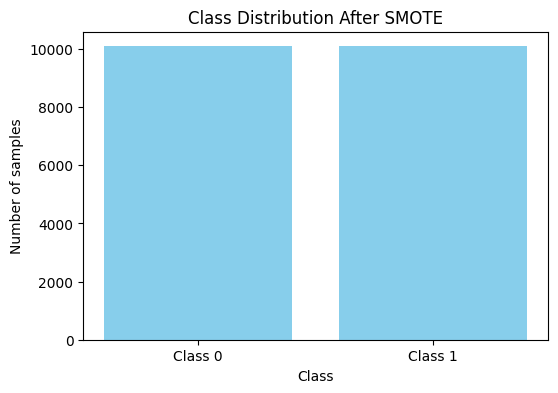

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the text, features, and label
X_features = df.iloc[:, 1:-1]  # Assuming the first column is text and the last column is the label
y = df.iloc[:, -1]  # Label column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Show class distribution before SMOTE
def plot_class_distribution(y, title):
    counter = Counter(y)
    plt.figure(figsize=(6,4))
    plt.bar(counter.keys(), counter.values(), color='skyblue')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.xticks([0, 1], labels=['Class 0', 'Class 1'])
    plt.show()

plot_class_distribution(y_train, 'Class Distribution Before SMOTE')

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Show class distribution after SMOTE
plot_class_distribution(y_train_smote, 'Class Distribution After SMOTE')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the original training dataset (11 features, text, and label)
train_file_path = 'Final_dataset.xlsx'  # Update with the correct file path for your training dataset
df_train = pd.read_excel(train_file_path)

# Separate the text, features, and label from the original training dataset
X_text_train = df_train.iloc[:, 0]  # Assuming first column is text
X_features_train = df_train.iloc[:, 1:-1]  # Assuming 11 features are in between
y_train = df_train.iloc[:, -1]  # Assuming last column is label

# Scale the numerical features
scaler = StandardScaler()
X_features_train_scaled = scaler.fit_transform(X_features_train)

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train)

# Combine the TF-IDF text features with the 11 numerical features
import numpy as np
X_train_combined = np.hstack((X_text_train_tfidf.toarray(), X_features_train_scaled))

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train, test_size=0.2, random_state=42)

# Define models (you can choose one or all for comparison)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1),
    'Support Vector Machine': SVC(probability=True)
}

# Train and evaluate models on the validation set
for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
    print(classification_report(y_val, y_val_pred))


Results for Logistic Regression:
Accuracy: 0.866852886405959
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2488
           1       0.85      0.83      0.84      1808

    accuracy                           0.87      4296
   macro avg       0.86      0.86      0.86      4296
weighted avg       0.87      0.87      0.87      4296

Results for Random Forest:
Accuracy: 0.9164338919925512
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2488
           1       0.97      0.83      0.89      1808

    accuracy                           0.92      4296
   macro avg       0.93      0.90      0.91      4296
weighted avg       0.92      0.92      0.92      4296

Results for Support Vector Machine:
Accuracy: 0.922486033519553
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2488
           1       0.92      0.89      0.91      1808

 

In [ ]:
import numpy as np

# Load the new dataset (x.xlsx) for testing
test_file_path = '/content/DS forTest.xlsx'  # Update with the correct file path for the x.xlsx dataset
df_test = pd.read_excel(test_file_path)

# Separate the text and labels from the new test dataset
X_text_test = df_test.iloc[:, 0]  # Assuming first column is text
y_test = df_test.iloc[:, -1]  # Assuming last column is label

# Vectorize the text of the new dataset using the previously fitted TF-IDF vectorizer
X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test)

# Create dummy values (zeros) for the 11 missing numerical features
dummy_numerical_features = np.zeros((X_text_test_tfidf.shape[0], 11))

# Combine the TF-IDF text features with the dummy numerical features
X_test_combined = np.hstack((X_text_test_tfidf.toarray(), dummy_numerical_features))

# Predict on the new dataset (x.xlsx)
y_test_pred = best_model.predict(X_test_combined)

# Evaluate performance on the new dataset
print("Results on x.xlsx dataset:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(classification_report(y_test, y_test_pred))


Results on x.xlsx dataset:
Accuracy: 0.509090909090909
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        55
           1       1.00      0.02      0.04        55

    accuracy                           0.51       110
   macro avg       0.75      0.51      0.35       110
weighted avg       0.75      0.51      0.35       110



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load the dataset (adjust the path to your actual file)
file_path = '/content/Final_dataset.xlsx'
df = pd.read_excel(file_path)

# Separate the text, features, and label
X_text = df.iloc[:, 0]  # Assuming the first column is text
X_features = df.iloc[:, 1:-1]  # The next 11 columns are the numerical features
y = df.iloc[:, -1]  # Assuming the last column is the label

# Step 2: Preprocess the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features if needed
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text)

# Step 3: Scale the numerical features
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)

# Step 4: Combine the TF-IDF text features with the 11 numerical features
X_combined = np.hstack((X_text_tfidf.toarray(), X_features_scaled))

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [ ]:
# Step 6: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Get feature importance
feature_importances = rf_model.feature_importances_

# Step 8: Combine feature names (from TF-IDF and the numerical features) and importance scores
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()  # Text features
numerical_feature_names = df.columns[1:-1].tolist()  # The 11 numerical features

# Concatenate feature names from both text and numerical features
all_feature_names = np.concatenate((tfidf_feature_names, numerical_feature_names))

# Step 9: Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 important features
print(feature_importance_df.head(10))


                     Feature  Importance
1007  Total reviewer reviews    0.084409
1008            Account type    0.068123
1000                PM Ratio    0.056643
1005          Generalization    0.054357
1004               Sentiment    0.043930
1001              FPSP Ratio    0.043424
1009           Useful votes     0.030935
1002           Review Length    0.023221
1010         Attached Medias    0.023146
364                    great    0.018557


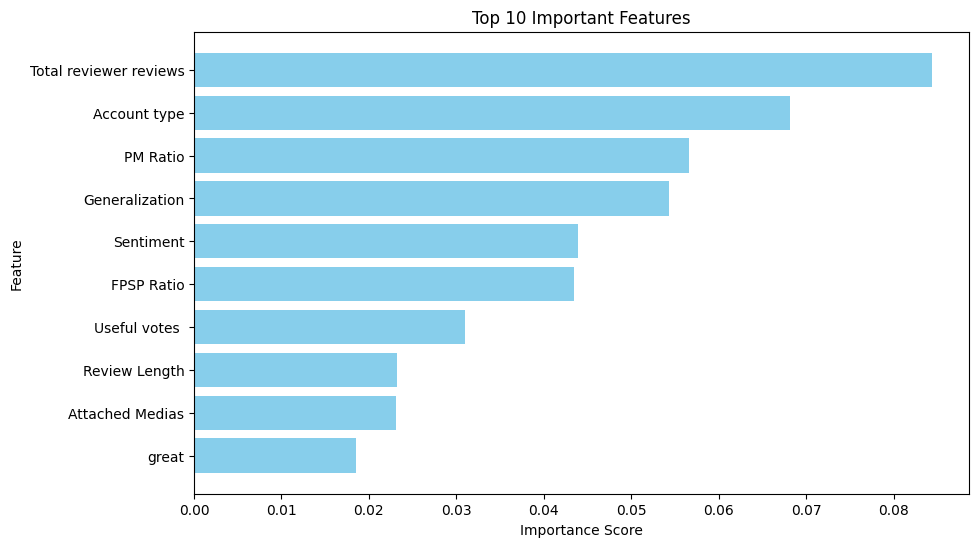

In [ ]:
import matplotlib.pyplot as plt

# Step 10: Visualize the top 10 important features
plt.figure(figsize=(10, 6))
top_features = feature_importance_df.head(10)
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


           PM Ratio    FPSP Ratio  Review Length      RW Ratio     Sentiment  \
count  21476.000000  21476.000000   21476.000000  21476.000000  21476.000000   
mean       0.030038      0.049946      28.014062      0.042207      0.472770   
std        0.024968      0.078833      36.210960      0.066321      0.482967   
min        0.000000      0.000000       3.000000      0.000000     -0.989900   
25%        0.015873      0.000000       8.000000      0.000000      0.226300   
50%        0.027027      0.000000      16.000000      0.000000      0.636900   
75%        0.039841      0.090909      34.000000      0.080161      0.848100   
max        0.322581      1.000000     772.000000      0.500000      0.998800   

       Generalization  Passive Voice  Total reviewer reviews  Account type  \
count    21476.000000   21476.000000            21476.000000  21476.000000   
mean         0.807607       0.031351               78.331952      0.430201   
std          0.291733       0.127883         

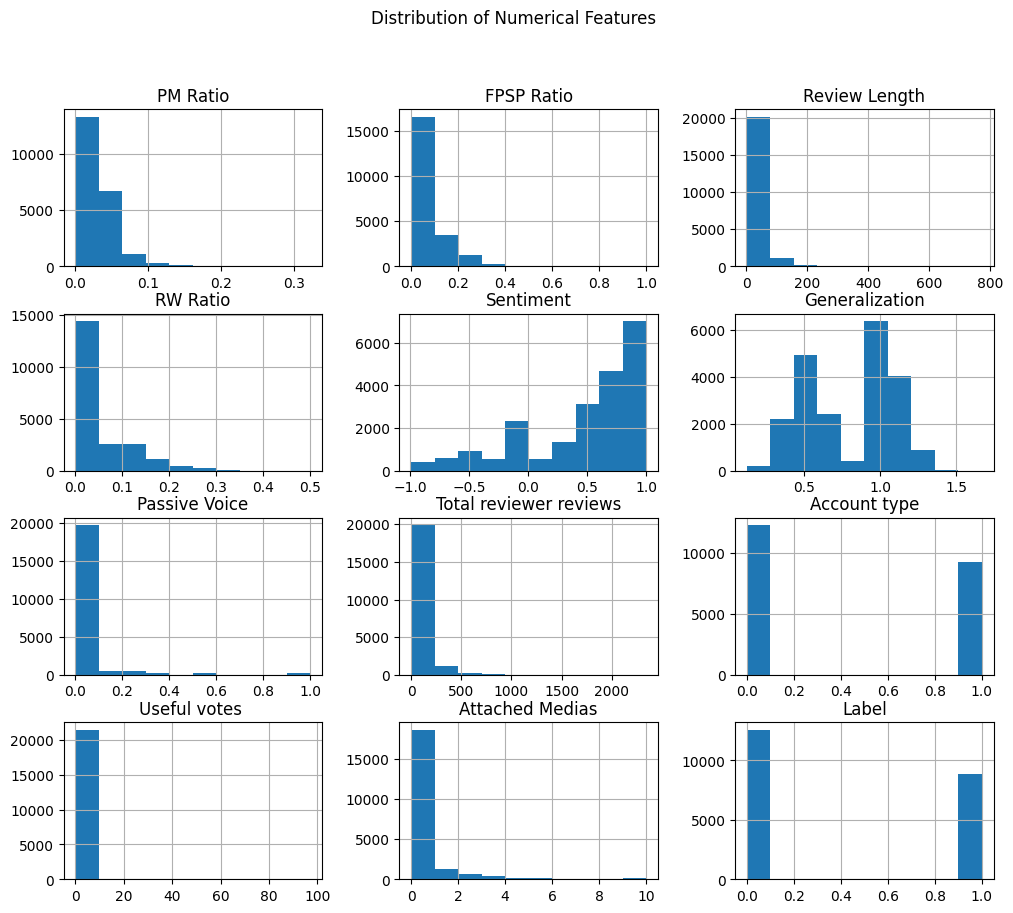

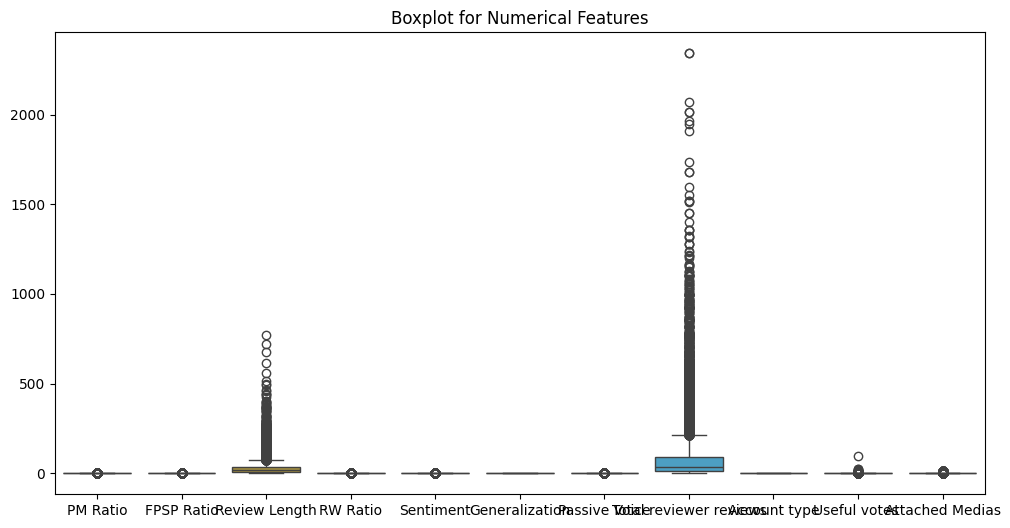

Skewness of numerical features:
PM Ratio                   2.076780
FPSP Ratio                 1.888158
Review Length              5.001629
RW Ratio                   1.592003
Sentiment                 -1.145626
Generalization            -0.196276
Passive Voice              5.490336
Total reviewer reviews     4.979350
Account type               0.281976
Useful votes              29.809530
Attached Medias            5.148666
dtype: float64
Missing values in each column:
review_text               0
PM Ratio                  0
FPSP Ratio                0
Review Length             0
RW Ratio                  0
Sentiment                 0
Generalization            0
Passive Voice             0
Total reviewer reviews    0
Account type              0
Useful votes              0
Attached Medias           0
Label                     0
dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Final_dataset.xlsx'
df = pd.read_excel(file_path)

# Display basic descriptive statistics for numerical columns
descriptive_stats = df.describe()
print(descriptive_stats)

# Plotting histograms for each numerical feature
df.hist(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Detect outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:-1])  # Assuming 11 numerical features are in columns 1 to -1
plt.title('Boxplot for Numerical Features')
plt.show()

# Detecting skewness in the data
skewness = df.iloc[:, 1:-1].skew()
print("Skewness of numerical features:")
print(skewness)

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


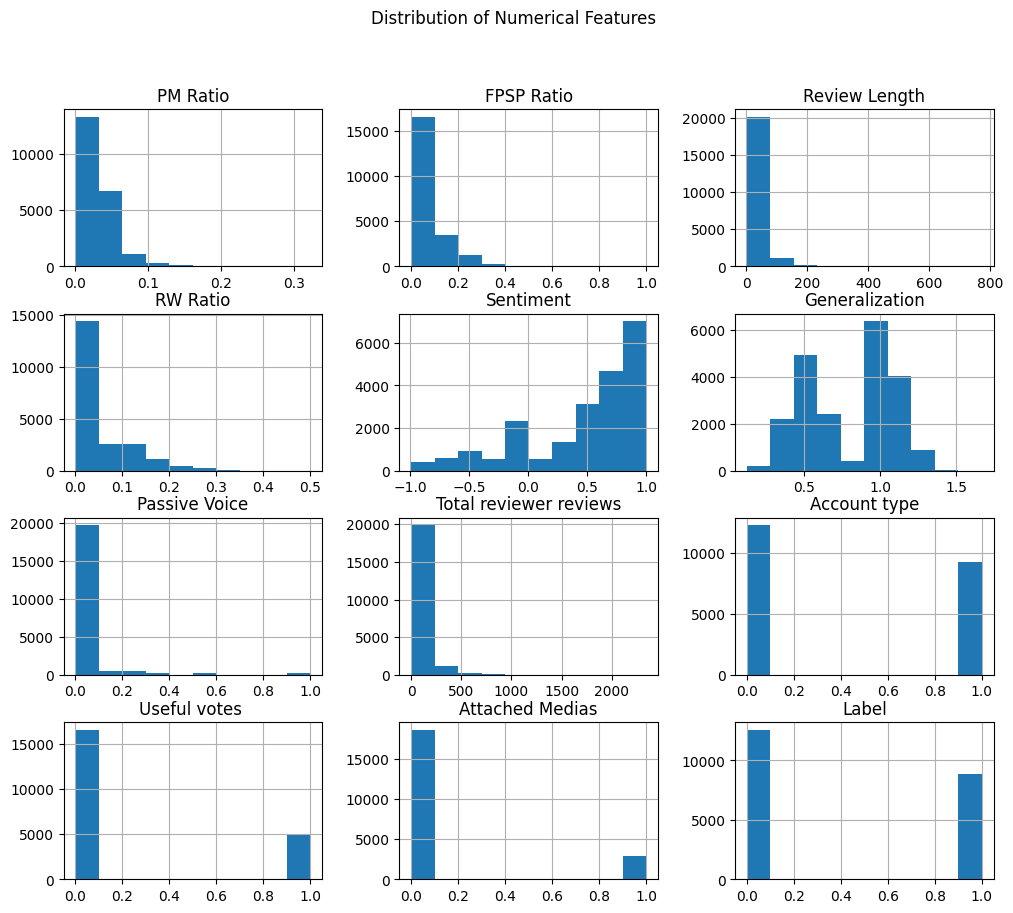

In [17]:

# Plotting histograms for each numerical feature
df.hist(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


Correlation Matrix:
                        PM Ratio  FPSP Ratio  Review Length  RW Ratio  \
PM Ratio                1.000000   -0.048084      -0.070072 -0.022779   
FPSP Ratio             -0.048084    1.000000       0.217690  0.122000   
Review Length          -0.070072    0.217690       1.000000  0.424255   
RW Ratio               -0.022779    0.122000       0.424255  1.000000   
Sentiment               0.038056   -0.102716      -0.001425  0.002445   
Generalization         -0.052488   -0.079250      -0.288601 -0.055304   
Passive Voice          -0.042594    0.047557       0.143815  0.079418   
Total reviewer reviews  0.014468   -0.007916      -0.007139 -0.012722   
Account type           -0.012711    0.019333       0.004405  0.012721   
Useful votes            0.004234    0.016914       0.011634  0.002685   
Attached Medias         0.003327   -0.001380       0.003243  0.003702   

                        Sentiment  Generalization  Passive Voice  \
PM Ratio                 0.038056  

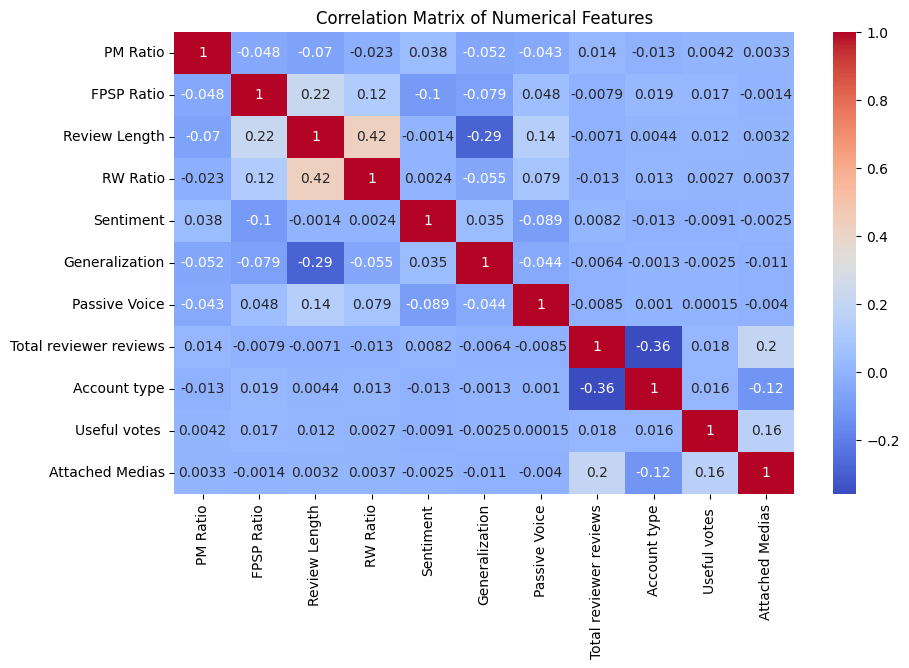

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming label column is the target (binary classification, 0 and 1)
# Numerical features are columns 1 to -1 (excluding text column and label)

# 1. Correlation between features
correlation_matrix = df.iloc[:, 1:-1].corr()  # Correlation between numerical features
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:

# 2. Hypothesis testing: Independent t-test (between groups labeled 0 and 1)
group_0 = df[df['Label'] == 0].iloc[:, 1:-1]  # Numerical features for group 0
group_1 = df[df['Label'] == 1].iloc[:, 1:-1]  # Numerical features for group 1



In [ ]:
# Perform t-test for each feature
for column in df.columns[1:-1]:
    t_stat, p_value = stats.ttest_ind(group_0[column], group_1[column], equal_var=False)
    print(f"T-test for {column}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# 3. Confidence Intervals for Mean of each feature
confidence_intervals = {}
for column in df.columns[1:-1]:
    mean = np.mean(df[column])
    std_err = stats.sem(df[column])  # Standard error of the mean
    confidence_interval = stats.t.interval(0.95, len(df[column])-1, loc=mean, scale=std_err)
    confidence_intervals[column] = confidence_interval

print("95% Confidence Intervals for each feature:")
for feature, ci in confidence_intervals.items():
    print(f"{feature}: {ci}")

# 4. ANOVA test to compare means across groups (if more than two groups exist)
# For binary classification (0, 1), this is similar to t-test
anova_results = {}
for column in df.columns[1:-1]:
    anova_result = stats.f_oneway(df[df['Label'] == 0][column], df[df['Label'] == 1][column])
    anova_results[column] = anova_result.pvalue
    print(f"ANOVA test for {column}: p-value = {anova_result.pvalue:.4f}")

# 5. Chi-Square Test for Independence (for categorical features if applicable)
# Assuming you have categorical data (e.g., in 'category_column') - example:
# chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['category_column'], df['label']))
# print(f"Chi-square test for category_column: p-value = {p:.4f}")


T-test for PM Ratio: t-statistic = -29.1983, p-value = 0.0000
T-test for FPSP Ratio: t-statistic = 43.2183, p-value = 0.0000
T-test for Review Length: t-statistic = 22.8459, p-value = 0.0000
T-test for RW Ratio: t-statistic = -8.4241, p-value = 0.0000
T-test for Sentiment: t-statistic = -26.8702, p-value = 0.0000
T-test for Generalization: t-statistic = -48.9778, p-value = 0.0000
T-test for Passive Voice: t-statistic = -5.4240, p-value = 0.0000
T-test for Total reviewer reviews: t-statistic = 43.7658, p-value = 0.0000
T-test for Account type: t-statistic = -61.3387, p-value = 0.0000
T-test for Useful votes : t-statistic = 19.6725, p-value = 0.0000
T-test for Attached Medias: t-statistic = 29.7680, p-value = 0.0000
95% Confidence Intervals for each feature:
PM Ratio: (0.029703551924199094, 0.030371460056271324)
FPSP Ratio: (0.04889124922505048, 0.05100003231341286)
Review Length: (27.52973830120042, 28.498386116754507)
RW Ratio: (0.0413199380576232, 0.043094034184246885)
Sentiment: (0.4

General Descriptive Statistics for the Dataset:
           PM Ratio    FPSP Ratio  Review Length      RW Ratio     Sentiment  \
count  21476.000000  21476.000000   21476.000000  21476.000000  21476.000000   
mean       0.030038      0.049946      28.014062      0.042207      0.472770   
std        0.024968      0.078833      36.210960      0.066321      0.482967   
min        0.000000      0.000000       3.000000      0.000000     -0.989900   
25%        0.015873      0.000000       8.000000      0.000000      0.226300   
50%        0.027027      0.000000      16.000000      0.000000      0.636900   
75%        0.039841      0.090909      34.000000      0.080161      0.848100   
max        0.322581      1.000000     772.000000      0.500000      0.998800   

       Generalization  Passive Voice  Total reviewer reviews  Account type  \
count    21476.000000   21476.000000            21476.000000  21476.000000   
mean         0.807607       0.031351               78.331952      0.430201 

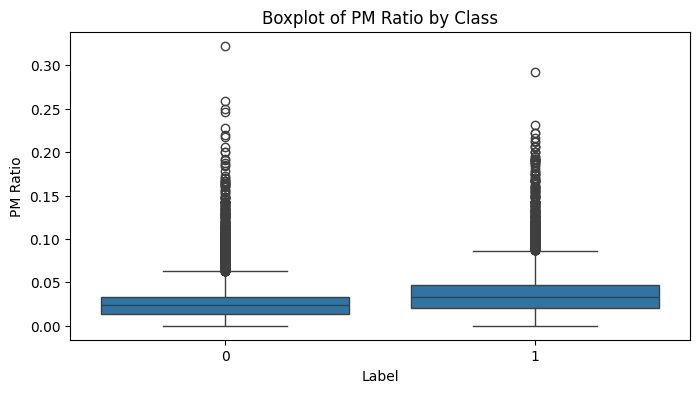

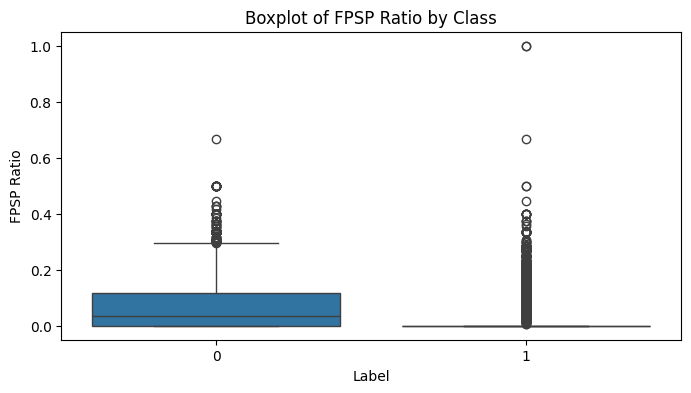

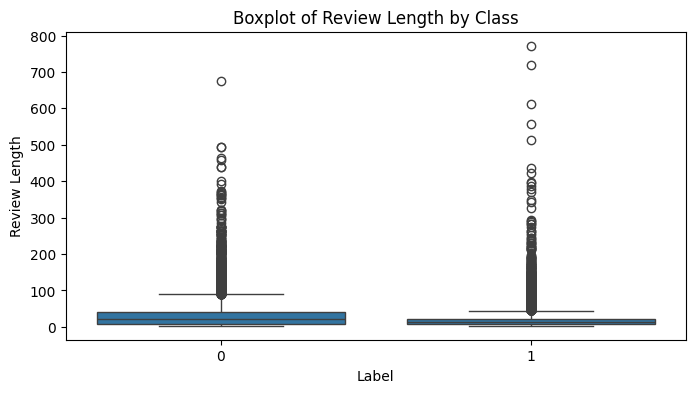

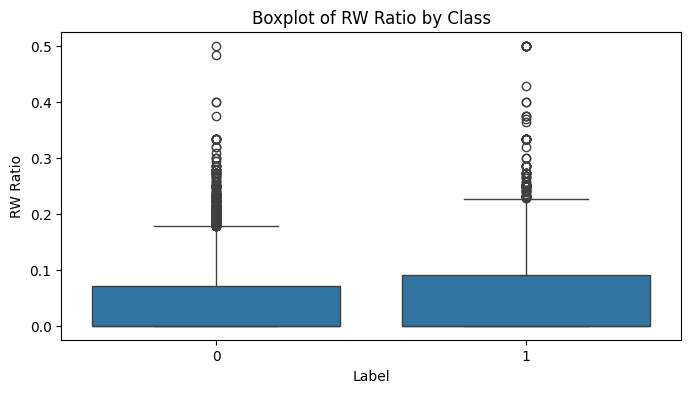

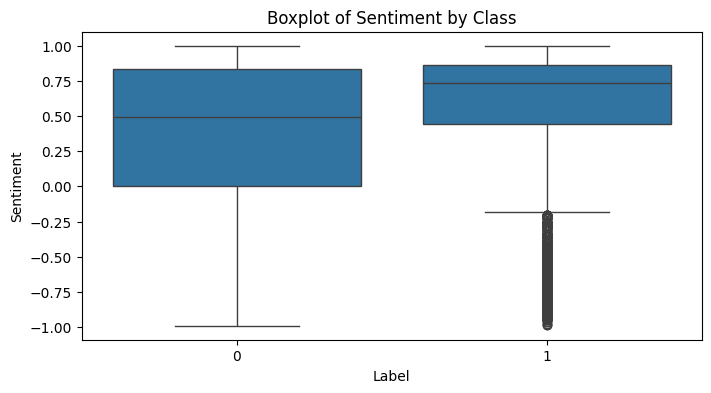

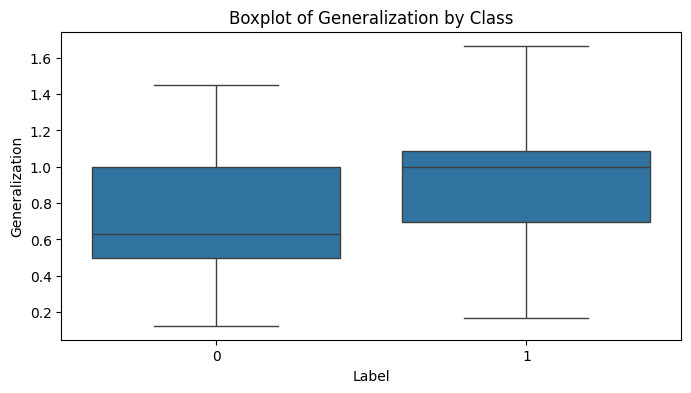

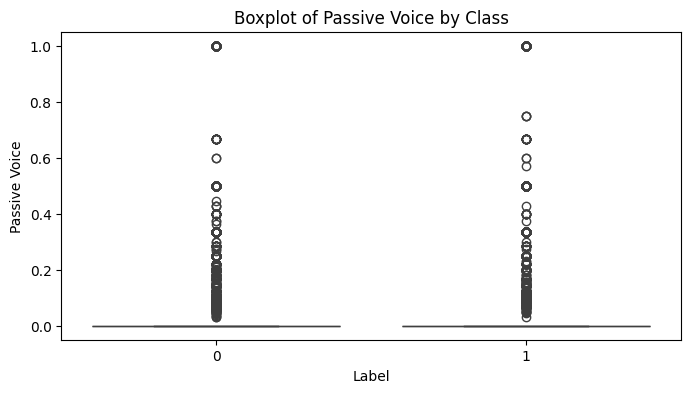

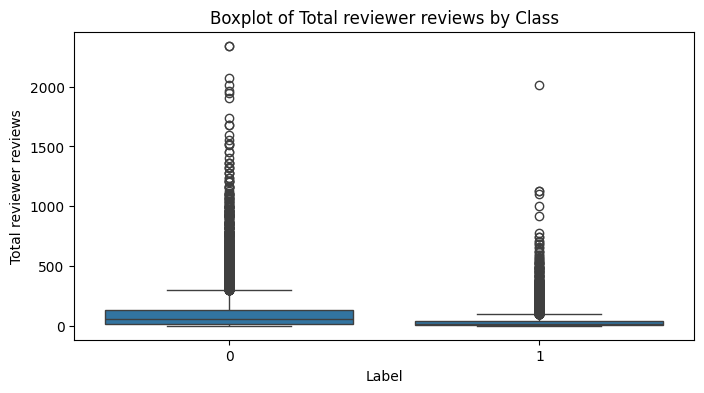

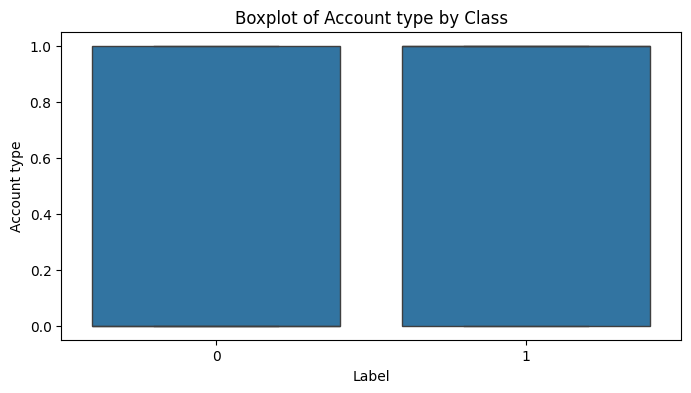

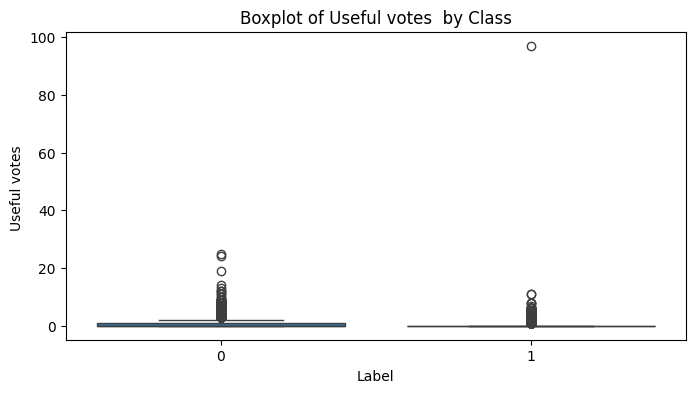

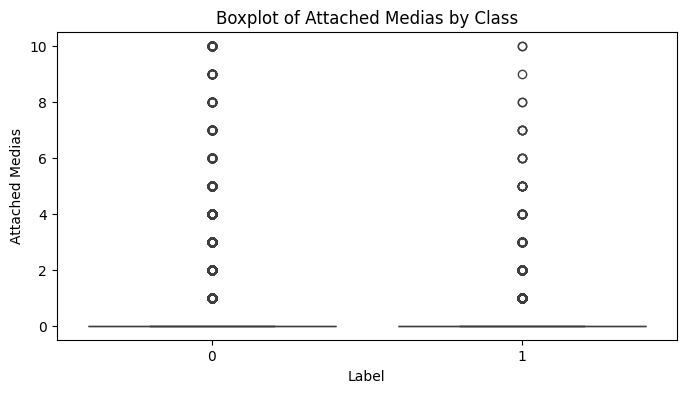

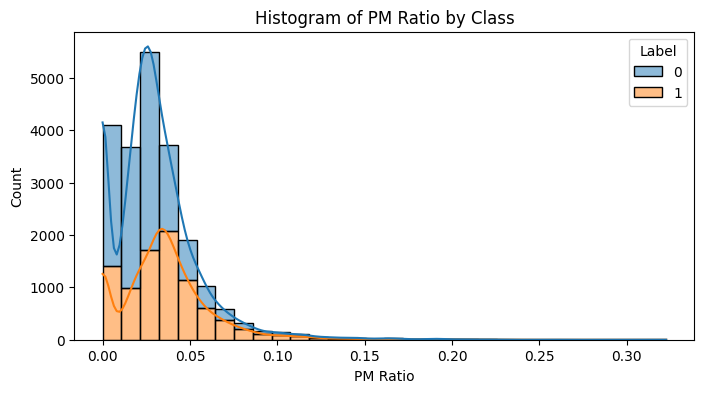

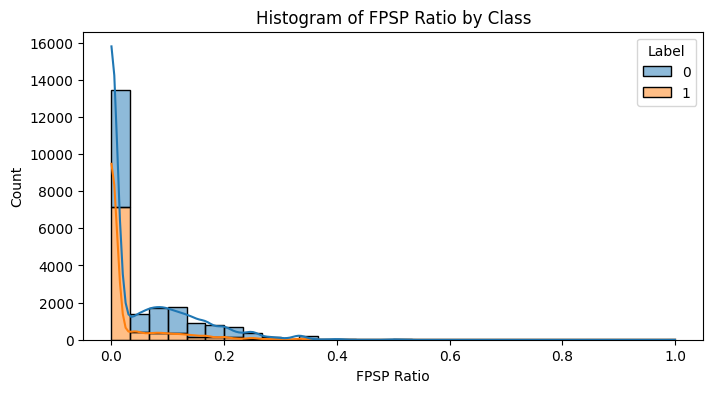

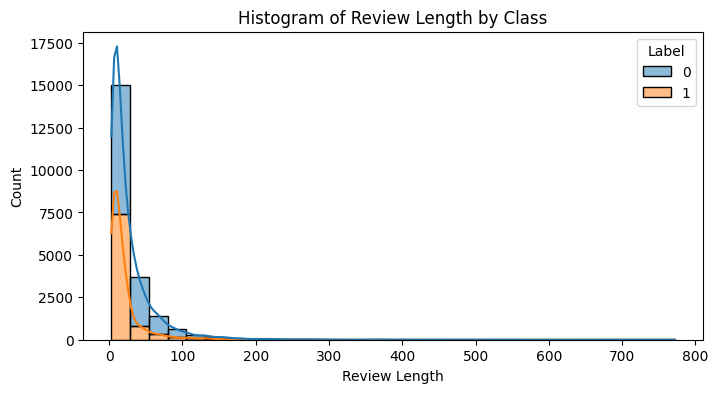

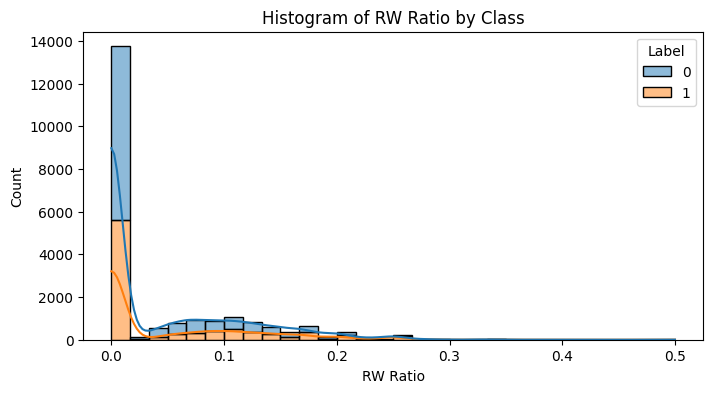

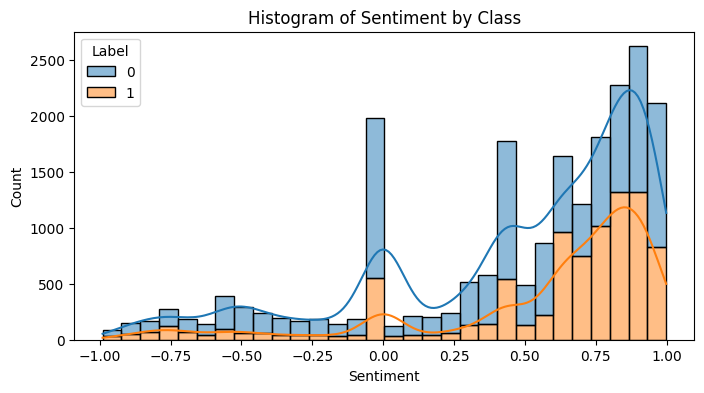

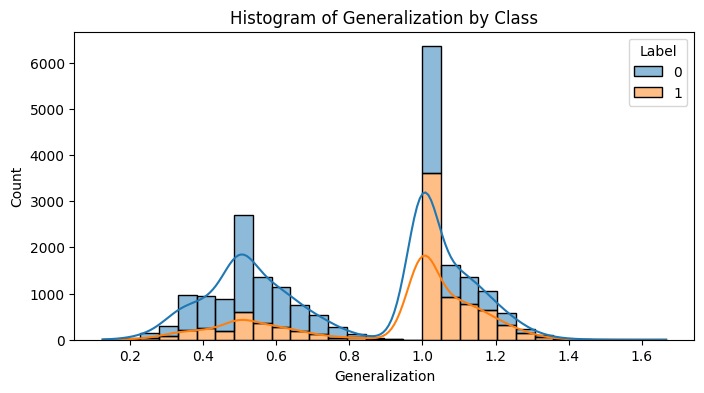

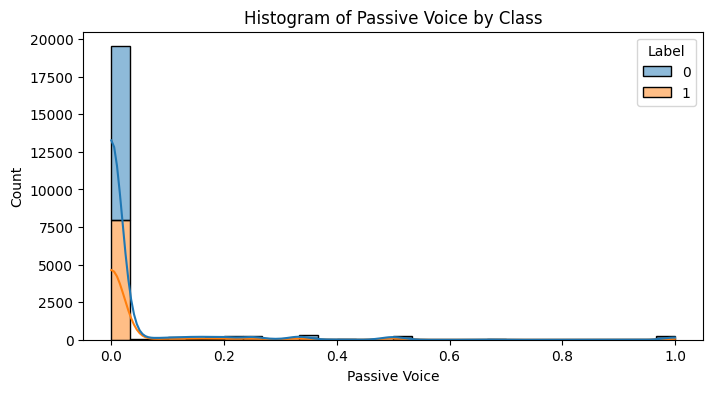

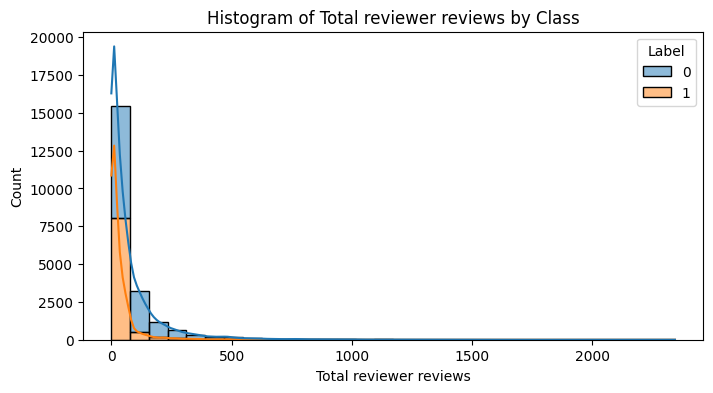

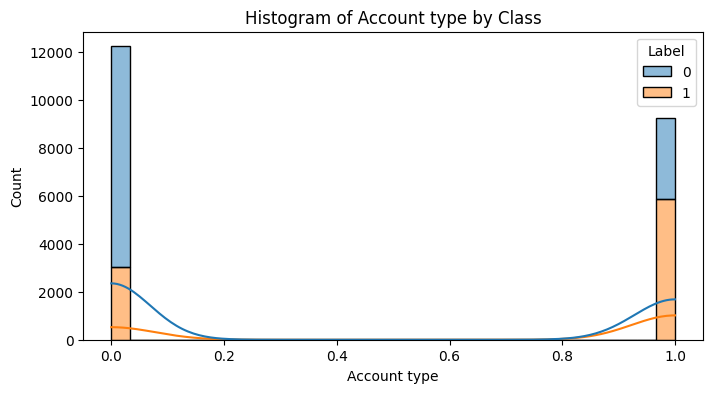

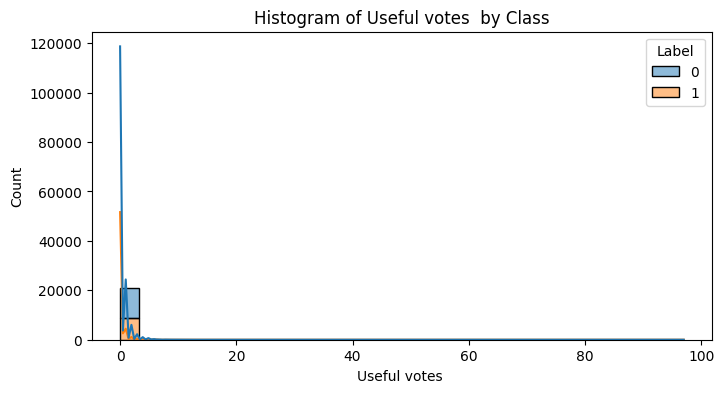

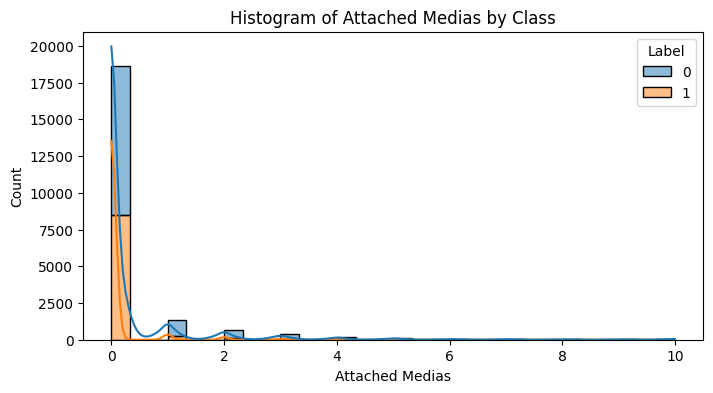


Correlation Matrix of the Numerical Features:
                        PM Ratio  FPSP Ratio  Review Length  RW Ratio  \
PM Ratio                1.000000   -0.048084      -0.070072 -0.022779   
FPSP Ratio             -0.048084    1.000000       0.217690  0.122000   
Review Length          -0.070072    0.217690       1.000000  0.424255   
RW Ratio               -0.022779    0.122000       0.424255  1.000000   
Sentiment               0.038056   -0.102716      -0.001425  0.002445   
Generalization         -0.052488   -0.079250      -0.288601 -0.055304   
Passive Voice          -0.042594    0.047557       0.143815  0.079418   
Total reviewer reviews  0.014468   -0.007916      -0.007139 -0.012722   
Account type           -0.012711    0.019333       0.004405  0.012721   
Useful votes            0.004234    0.016914       0.011634  0.002685   
Attached Medias         0.003327   -0.001380       0.003243  0.003702   

                        Sentiment  Generalization  Passive Voice  \
PM Ratio

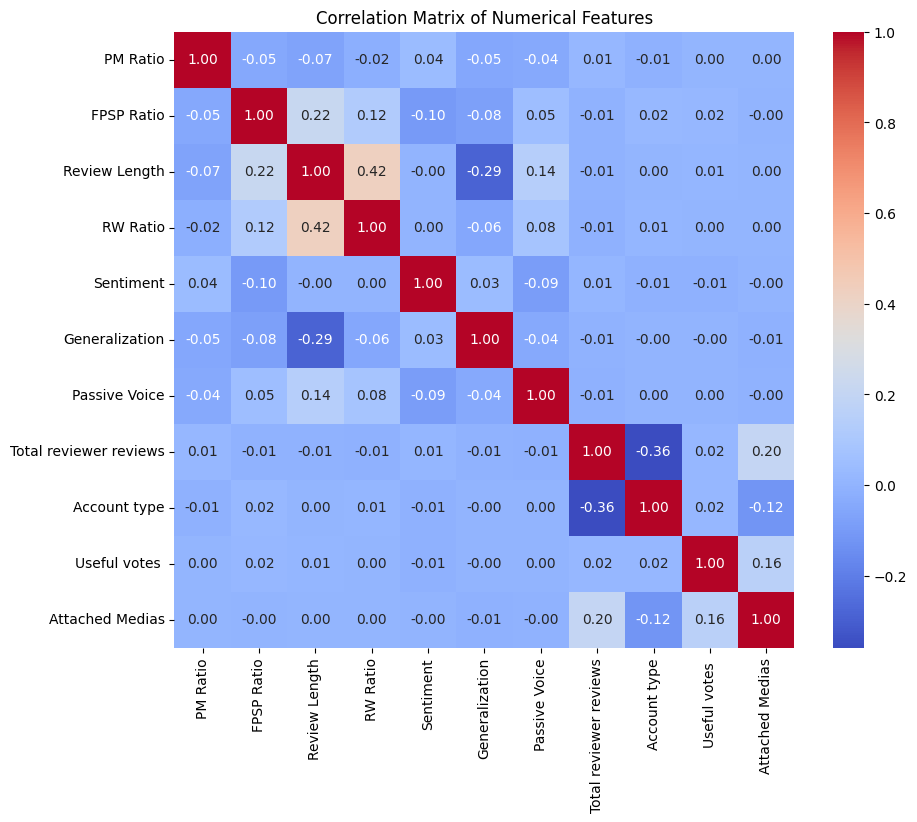

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update file path as needed)
file_path = 'Final_dataset.xlsx'
df = pd.read_excel(file_path)

# Descriptive statistics for the whole dataset
print("General Descriptive Statistics for the Dataset:")
print(df.describe())

# Calculate the distribution of classes (0 and 1)
class_distribution = df['Label'].value_counts()
print("\nClass Distribution (0 and 1):")
print(class_distribution)

# Group by 'label' (0 and 1) and calculate statistics for each feature
class_grouped_stats = df.groupby('Label').describe()
print("\nDescriptive Statistics Grouped by Class (0 and 1):")
print(class_grouped_stats)

# Boxplots for each feature by class (0 and 1)
features = df.columns[1:-1]  # Assuming numerical features are in columns 1 to -1
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Label', y=feature, data=df)
    plt.title(f"Boxplot of {feature} by Class")
    plt.show()

# Histograms for each feature by class (0 and 1)
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='Label', multiple="stack", bins=30, kde=True)
    plt.title(f"Histogram of {feature} by Class")
    plt.show()

# Correlation matrix for the numerical features
print("\nCorrelation Matrix of the Numerical Features:")
corr_matrix = df.iloc[:, 1:-1].corr()  # Assuming numerical features are in columns 1 to -1
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


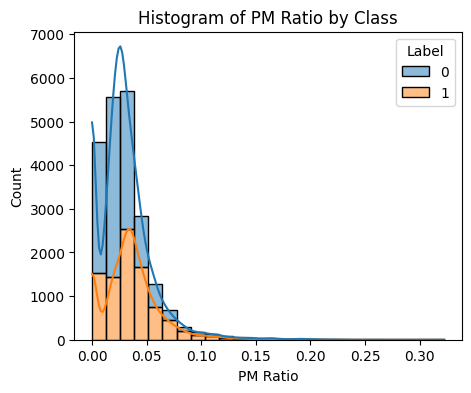

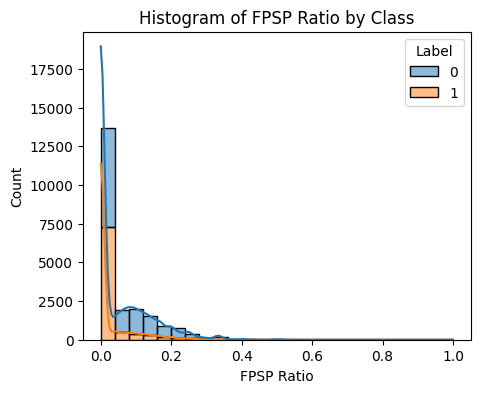

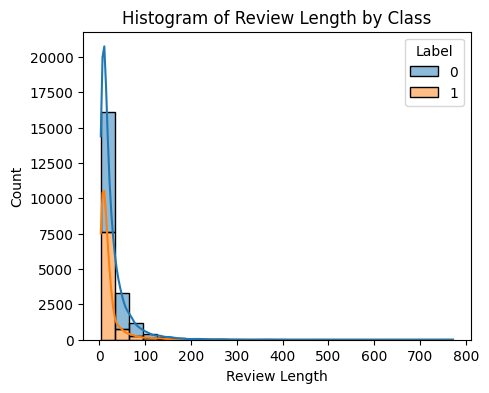

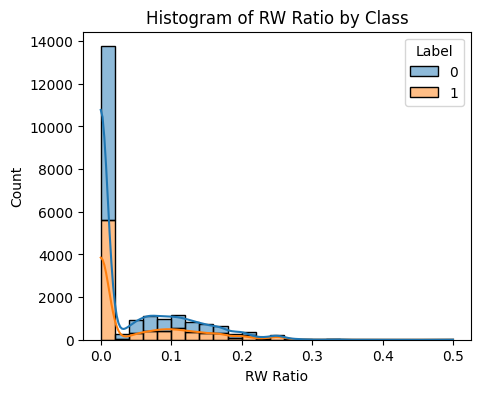

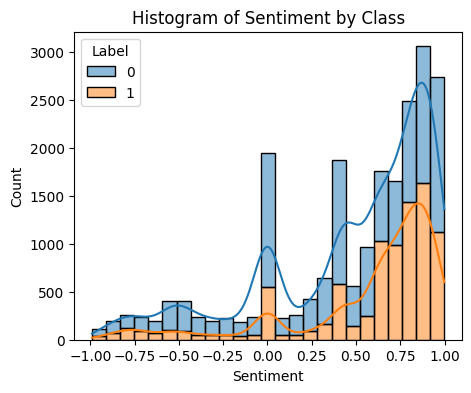

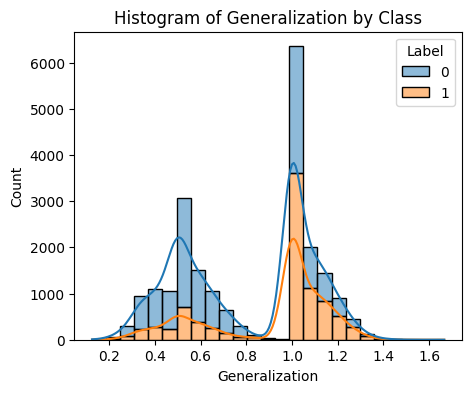

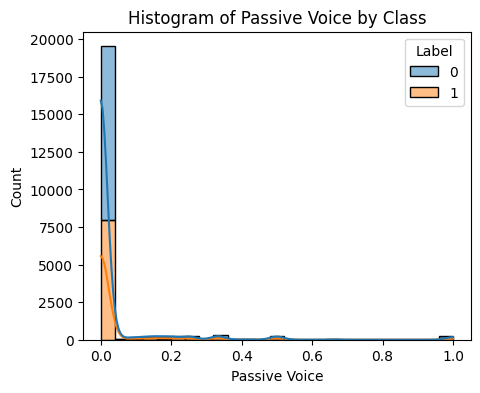

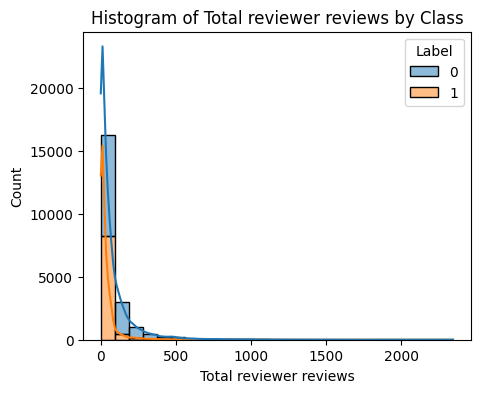

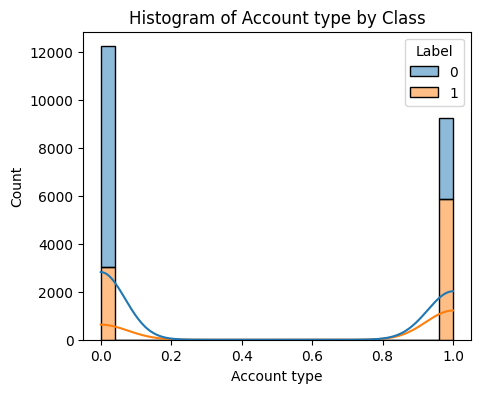

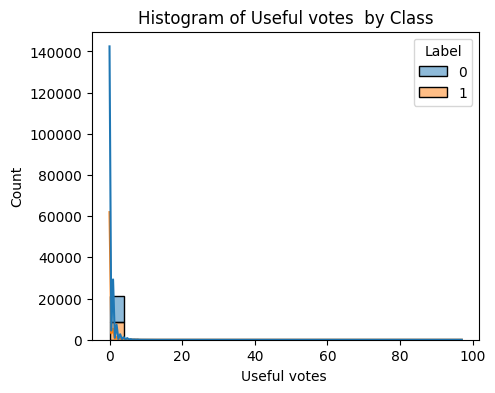

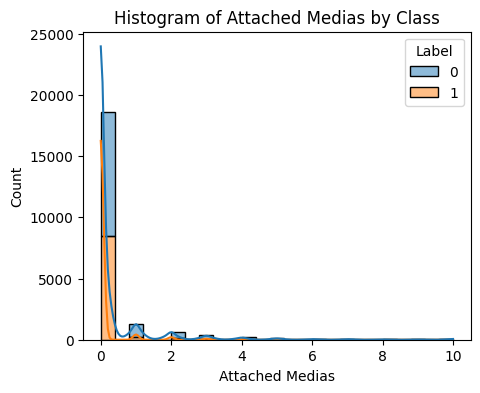

In [6]:
# Histograms for each feature by class (0 and 1)
for feature in features:
    plt.figure(figsize=(5, 4))
    sns.histplot(data=df, x=feature, hue='Label', multiple="stack", bins=25, kde=True)
    plt.title(f"Histogram of {feature} by Class")
    plt.show()


In [16]:
import pandas as pd

# Load the dataset (assuming a.xlsx has the binary columns 'bb', 'cc', and 'xx')
file_path = 'Final_dataset.xlsx'
df = pd.read_excel(file_path)

binary_columns = ['Account type', 'Attached Medias']
binary_df = df[binary_columns]

# 1. Frequency/Count for each binary column
print("Frequency of 0s and 1s for each binary column:")
for col in binary_columns:
    print(f"\n{col}:")
    print(binary_df[col].value_counts())

# 2. Proportion/Percentage for each binary column
print("\nProportion of 0s and 1s for each binary column:")
for col in binary_columns:
    print(f"\n{col}:")
    print(binary_df[col].value_counts(normalize=True) * 100)

# 3. Mode for each binary column
print("\nMode of each binary column:")
for col in binary_columns:
    print(f"\n{col}: Mode = {binary_df[col].mode()[0]}")

# 4. Mean (Proportion of 1s) for each binary column
print("\nMean (Proportion of 1s) for each binary column:")
for col in binary_columns:
    print(f"\n{col}: Mean (Proportion of 1s) = {binary_df[col].mean()}")

# 5. Variance for each binary column
print("\nVariance of each binary column:")
for col in binary_columns:
    print(f"\n{col}: Variance = {binary_df[col].var()}")

# 6. Correlation between the binary columns
print("\nCorrelation matrix of the binary columns:")
correlation_matrix = binary_df.corr()
print(correlation_matrix)

# 7. Cross-tabulation between the binary columns
print("\nCross-tabulation between 'bb' and 'cc':")
print(pd.crosstab(binary_df['bb'], binary_df['cc']))

print("\nCross-tabulation between 'bb' and 'xx':")
print(pd.crosstab(binary_df['bb'], binary_df['xx']))

print("\nCross-tabulation between 'cc' and 'xx':")
print(pd.crosstab(binary_df['cc'], binary_df['xx']))


Frequency of 0s and 1s for each binary column:

Account type:
Account type
0    12237
1     9239
Name: count, dtype: int64

Attached Medias:
Attached Medias
0    18597
1     2879
Name: count, dtype: int64

Proportion of 0s and 1s for each binary column:

Account type:
Account type
0    56.979885
1    43.020115
Name: proportion, dtype: float64

Attached Medias:
Attached Medias
0    86.594338
1    13.405662
Name: proportion, dtype: float64

Mode of each binary column:

Account type: Mode = 0

Attached Medias: Mode = 0

Mean (Proportion of 1s) for each binary column:

Account type: Mean (Proportion of 1s) = 0.430201154777426

Attached Medias: Mean (Proportion of 1s) = 0.13405662134475693

Variance of each binary column:

Account type: Variance = 0.24513953578632644

Attached Medias: Variance = 0.11609084922693576

Correlation matrix of the binary columns:
                 Account type  Attached Medias
Account type         1.000000        -0.091242
Attached Medias     -0.091242         1.0

KeyError: 'bb'

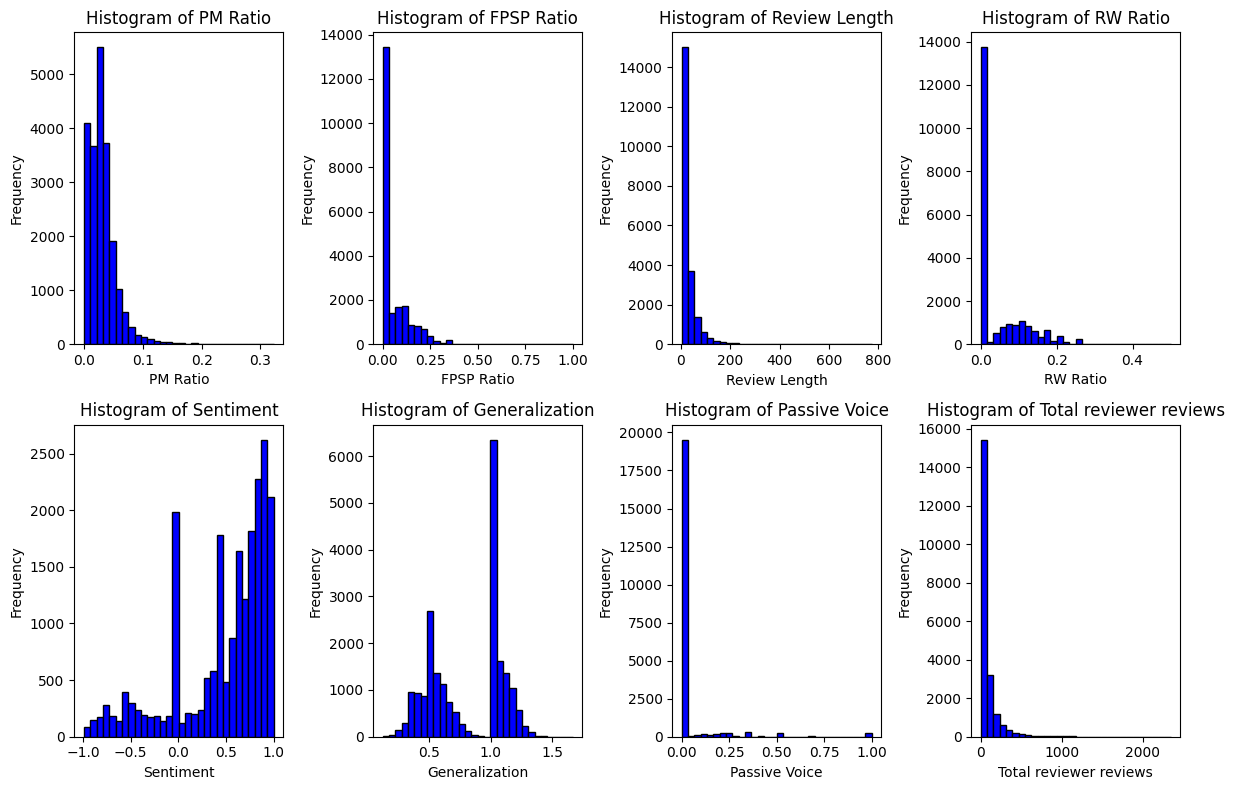

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as needed)
file_path = 'Final_dataset.xlsx'
df = pd.read_excel(file_path)

# Select the first 8 features (assuming the first column is text and the next 8 are numerical features)
features = df.columns[1:9]  # Columns 1 to 8 (excluding the text column)

# Plot histograms for each feature
plt.figure(figsize=(12, 8))  # Set figure size
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)  # Create a 2x4 grid of subplots
    plt.hist(df[feature], bins=30, color='blue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit in the figure
plt.show()


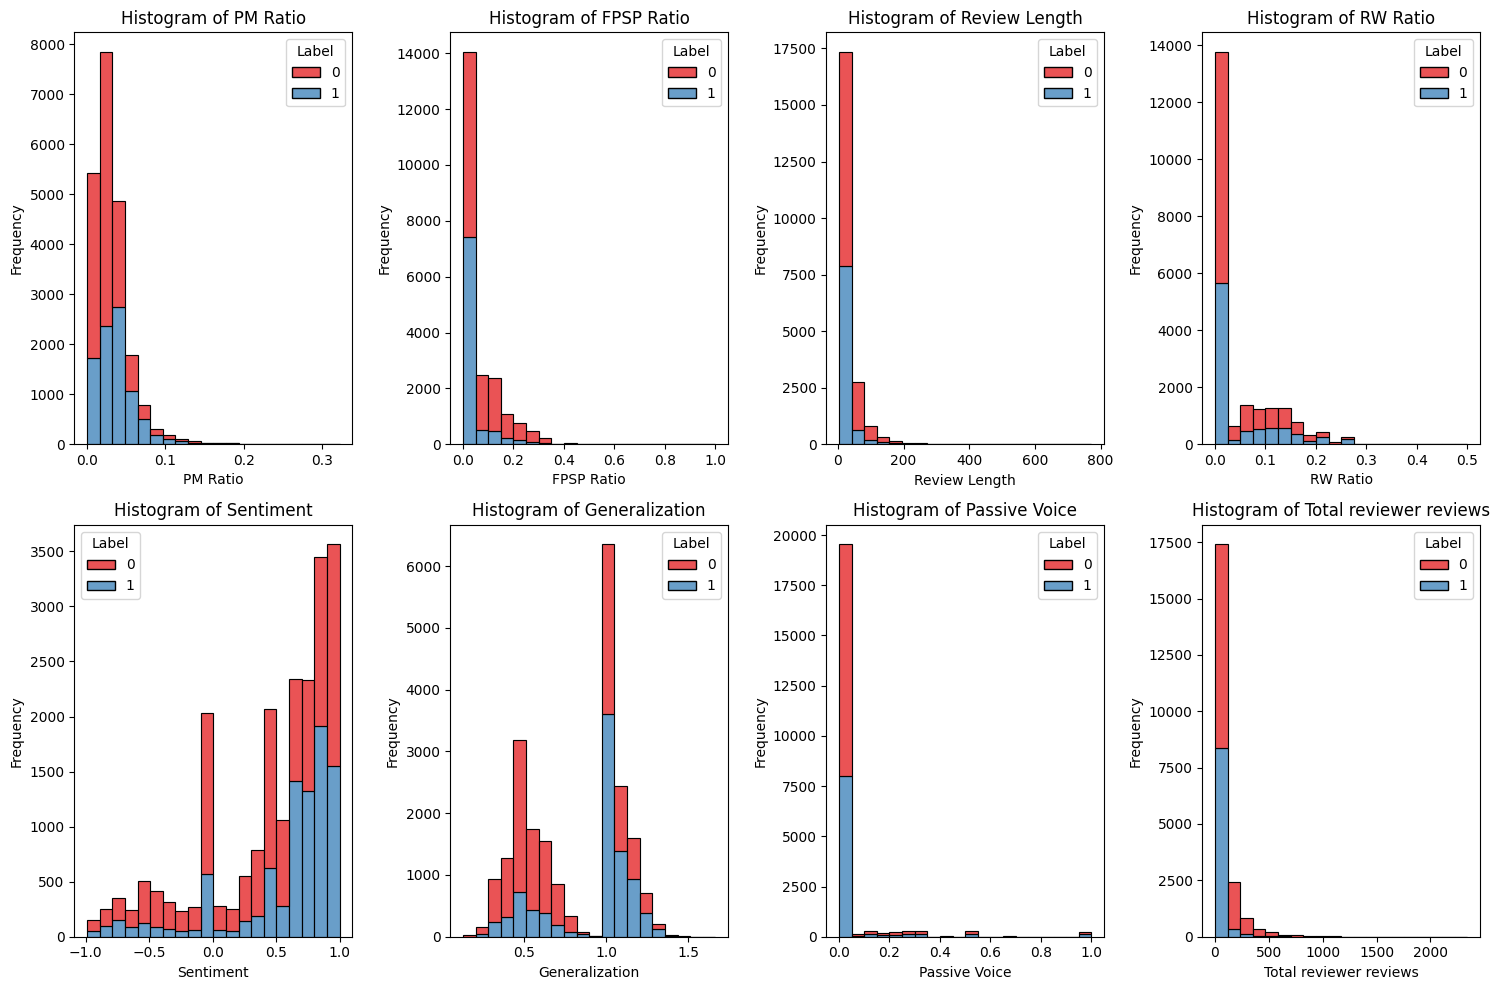

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select the first 8 features (assuming the first column is text and the next 8 are numerical features)
features = df.columns[1:9]  # Columns 1 to 8 (excluding the text column)

# Assuming the label is in the last column
label_column = 'Label'  # Update if your label column has a different name

# Plot histograms for each feature with class separation
plt.figure(figsize=(15, 10))  # Set figure size
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)  # Create a 2x4 grid of subplots
    sns.histplot(data=df, x=feature, hue=label_column, multiple="stack", bins=20, palette="Set1", edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit in the figure
plt.show()


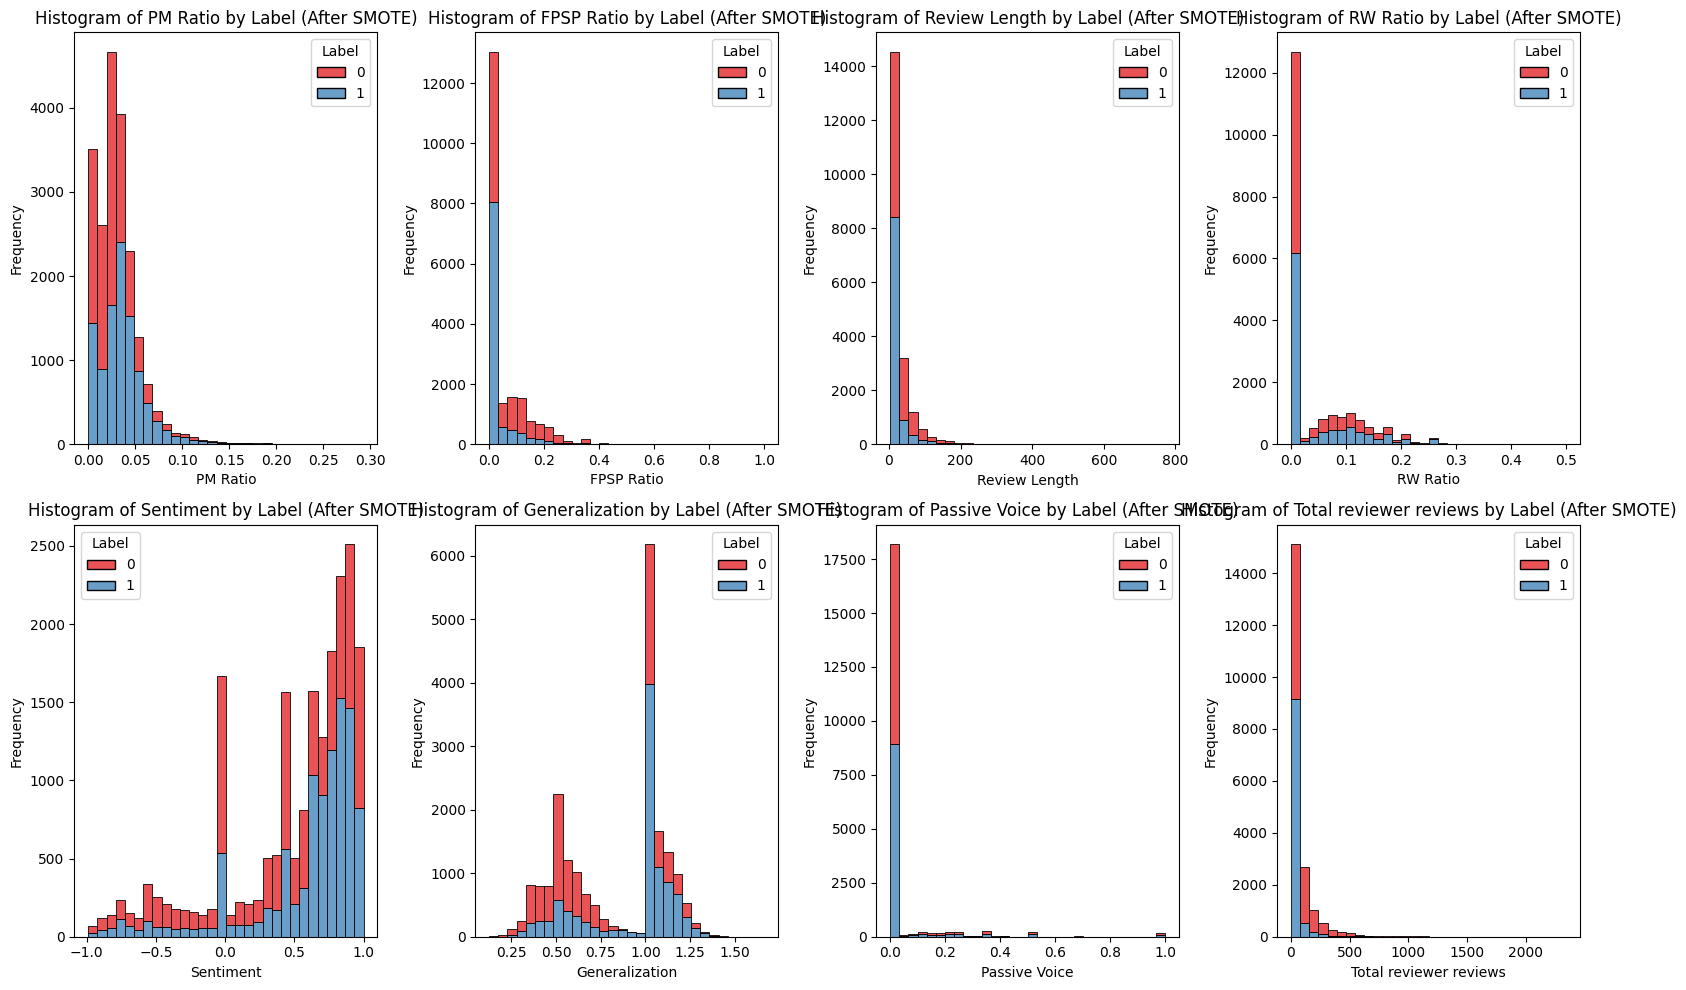

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Select the features and the label
X = df.iloc[:, 1:-1]  # Assuming features are columns 1 to -1 (excluding the text column)
y = df.iloc[:, -1]    # Assuming the label is the last column

# Split data into training and testing sets (optional, if you want to focus on training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert resampled data to a DataFrame
X_train_smote_df = pd.DataFrame(X_train_smote, columns=df.columns[1:-1])  # Add column names back
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['Label'])  # Add label back

# Combine X_train and y_train after SMOTE
df_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

# Plot histograms for the first 8 features after SMOTE with class separation
plt.figure(figsize=(16, 10))  # Set figure size
features = df.columns[1:9]  # Columns 1 to 8 (excluding the text column)

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)  # Create a 2x4 grid of subplots
    sns.histplot(data=df_smote, x=feature, hue='Label', multiple="stack", bins=30, palette="Set1", edgecolor='black')
    plt.title(f'Histogram of {feature} by Label (After SMOTE)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit in the figure
plt.show()
